# K-Means
Clustering is a machine learning technique that involves grouping similar data points together into so called clusters. Clustering is an unsupervised learning method commonly used in data science and other fields.

KMeans is probably the most well-known of all the clustering algorithm. Its goal is to separate the data into K distinct non-overlapping subgroups (clusters) of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.



## KMeans theory
KMeans works as follows:

1. First, pick the number of clusters (For more info, check the "Choosing K" section).
2. Initialize the center points of the cluster (centroids) by shuffling the dataset and then selecting K data points for the centroids.
3. Assign data points to the cluster with the nearest centroid.
4. Recompute centroid position by taking the mean of all data points assigned to the cluster.
5. Repeat steps 3 and 4 for a set number of iterations or until the centroids aren't moving much between iterations anymore.

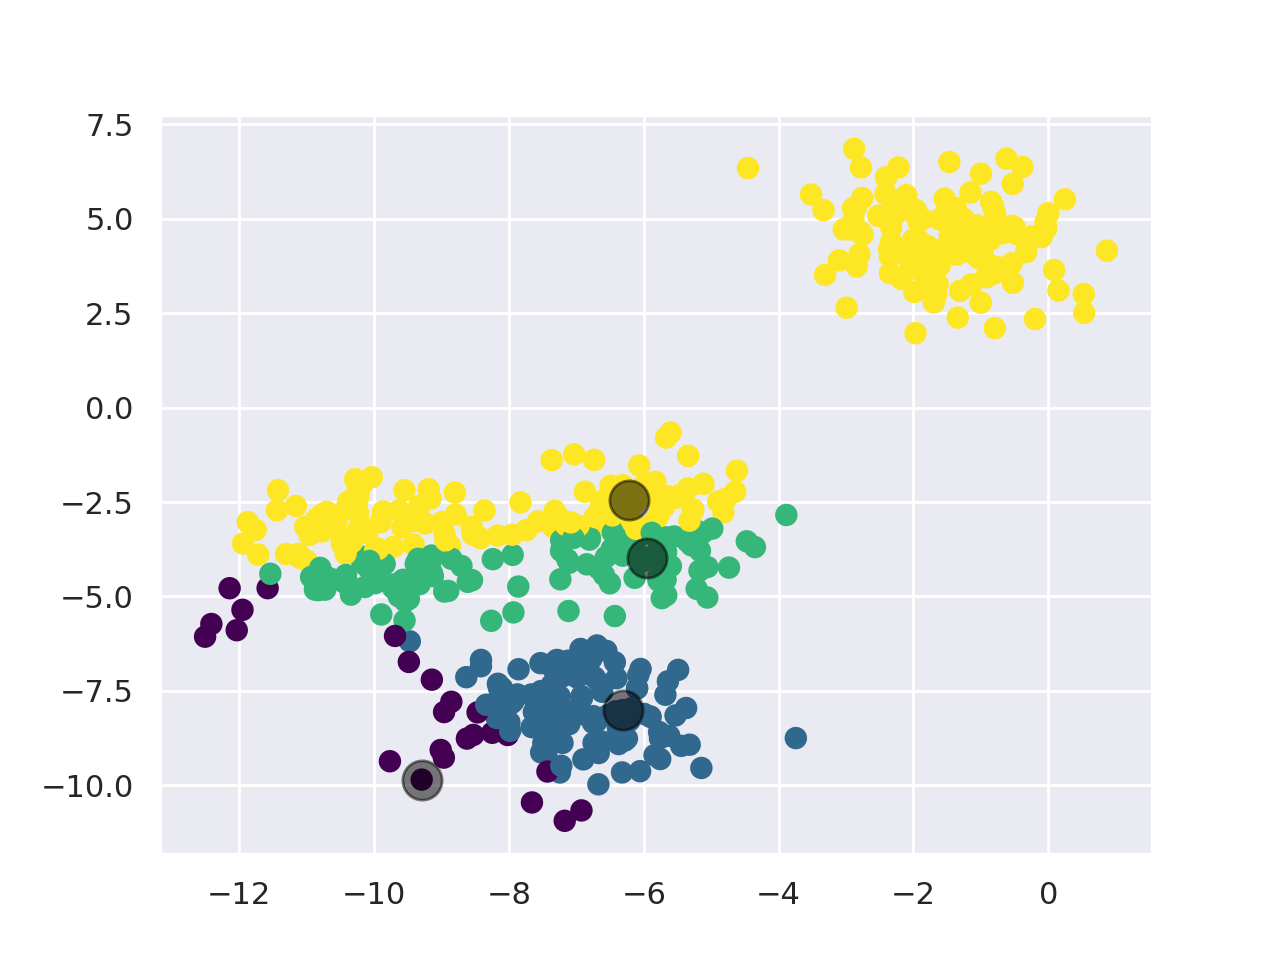

In [9]:
from IPython.display import Image 
pil_img = Image(filename='./img/k_means.gif.png')
display(pil_img)

## Choosing K
Choosing the right K value by hand can get quite tricky, especially if you're working with 3+ dimensional data. If you select a too small or big number for K, the result can be quite underwhelming.

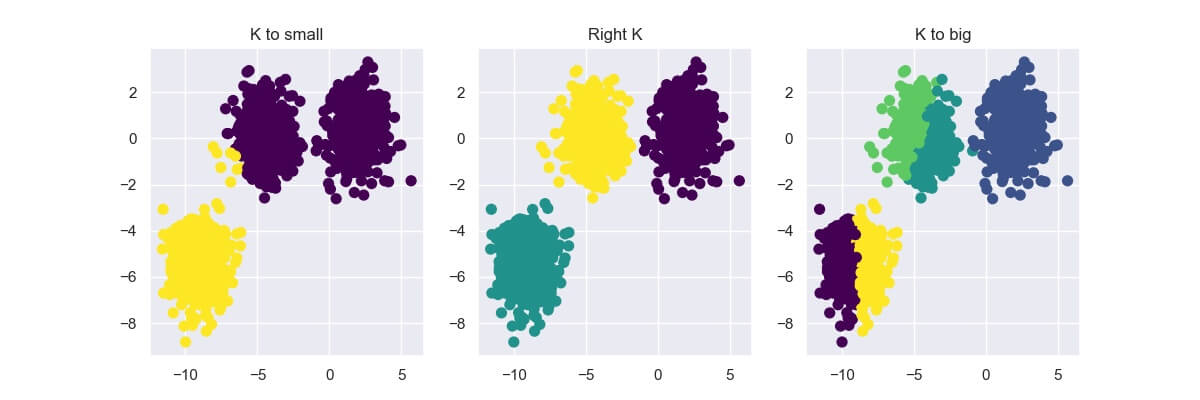

In [1]:
from IPython.display import Image 
pil_img = Image(filename='./img/choose_k_value.jpeg')
display(pil_img)

In this section, I'll show you two methods commonly used to choose the right K value:

- The Elbow Method
- Silhouette Analysis

## Elbow Method
The Elbow Method shows us what a good number for K is based on the sum of squared distances (SSE) between data points and their assigned clusters' centroid. We pick k at the spot where the SSE starts to flatten out, which looks like an elbow

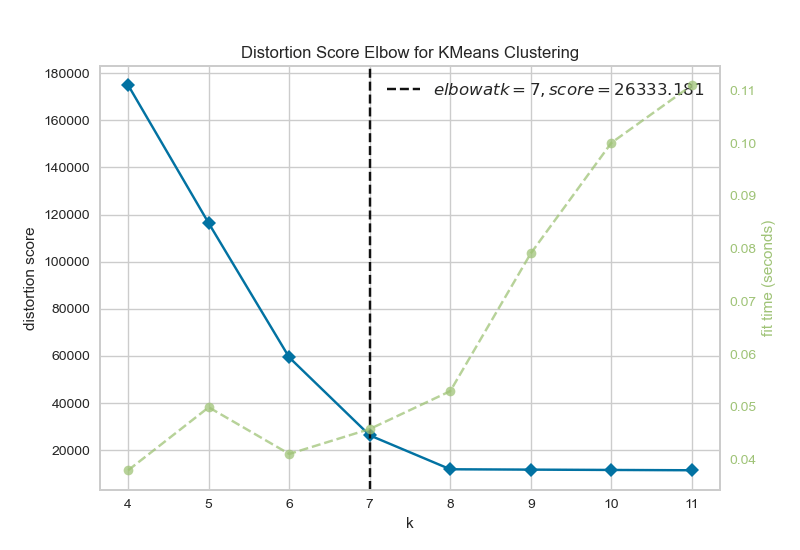

In [2]:
pil_img = Image(filename='./img/elbow_method.png')
display(pil_img)

## Silhouette Analysis
The Silhouette Analysis can be used to study the separation distance between the resulting clusters. It displays a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation) and can thus be used to assess the number of clusters k.

The Silhouette Analysis is computed as follows:

- Compute the average distance between all data points in one cluster 


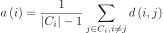

In [6]:
pil_img = Image(filename='./img/1.png')
display(pil_img)

- For all data points  in cluster  compute the average distance to all points in another cluster

In [7]:
pil_img = Image(filename='./img/2.png')
display(pil_img)

- We can now calculate the silhouette coefficient:

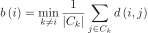

In [8]:
pil_img = Image(filename='./img/3.png')
display(pil_img)

## Implementation

In [37]:
# import libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
# path 
data_dict_path = './data-dictionary.csv'
country_path = './Country-data.csv'

In [39]:
# read csv files
dict_df = pd.read_csv(data_dict_path)
df = pd.read_csv(country_path)

In [40]:
# first few rows of dictionary dataset
dict_df.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [41]:
# first few rows of countrty dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
# shape of dataset
df.shape

(167, 10)

In [43]:
#some basic info
df.info()
print(50*'-')
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory

In [44]:
#some basic statistical data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [45]:
#null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [46]:
#null value
dict_df.isnull().sum()

Column Name    0
Description    0
dtype: int64

Let's see the number of unique countries present in our dataset

In [47]:
#number of unique countries
df['country'].nunique()

167

As we are going to use Unsupervised learning technique we don't need the country column here.So we are going to drop it

In [48]:
#drop country column
data=df.drop(['country'],axis=1)

In [49]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

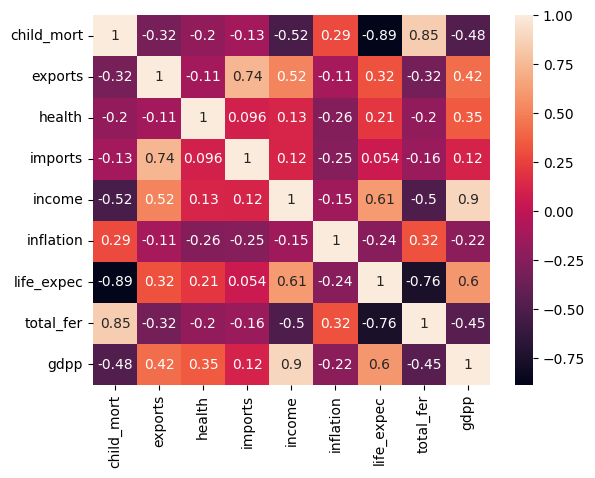

In [50]:
#correlation 
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

From above we can conclude that:<br>

1. gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated<br>
2. whereas life_expec and child_mort are highly negative correlated

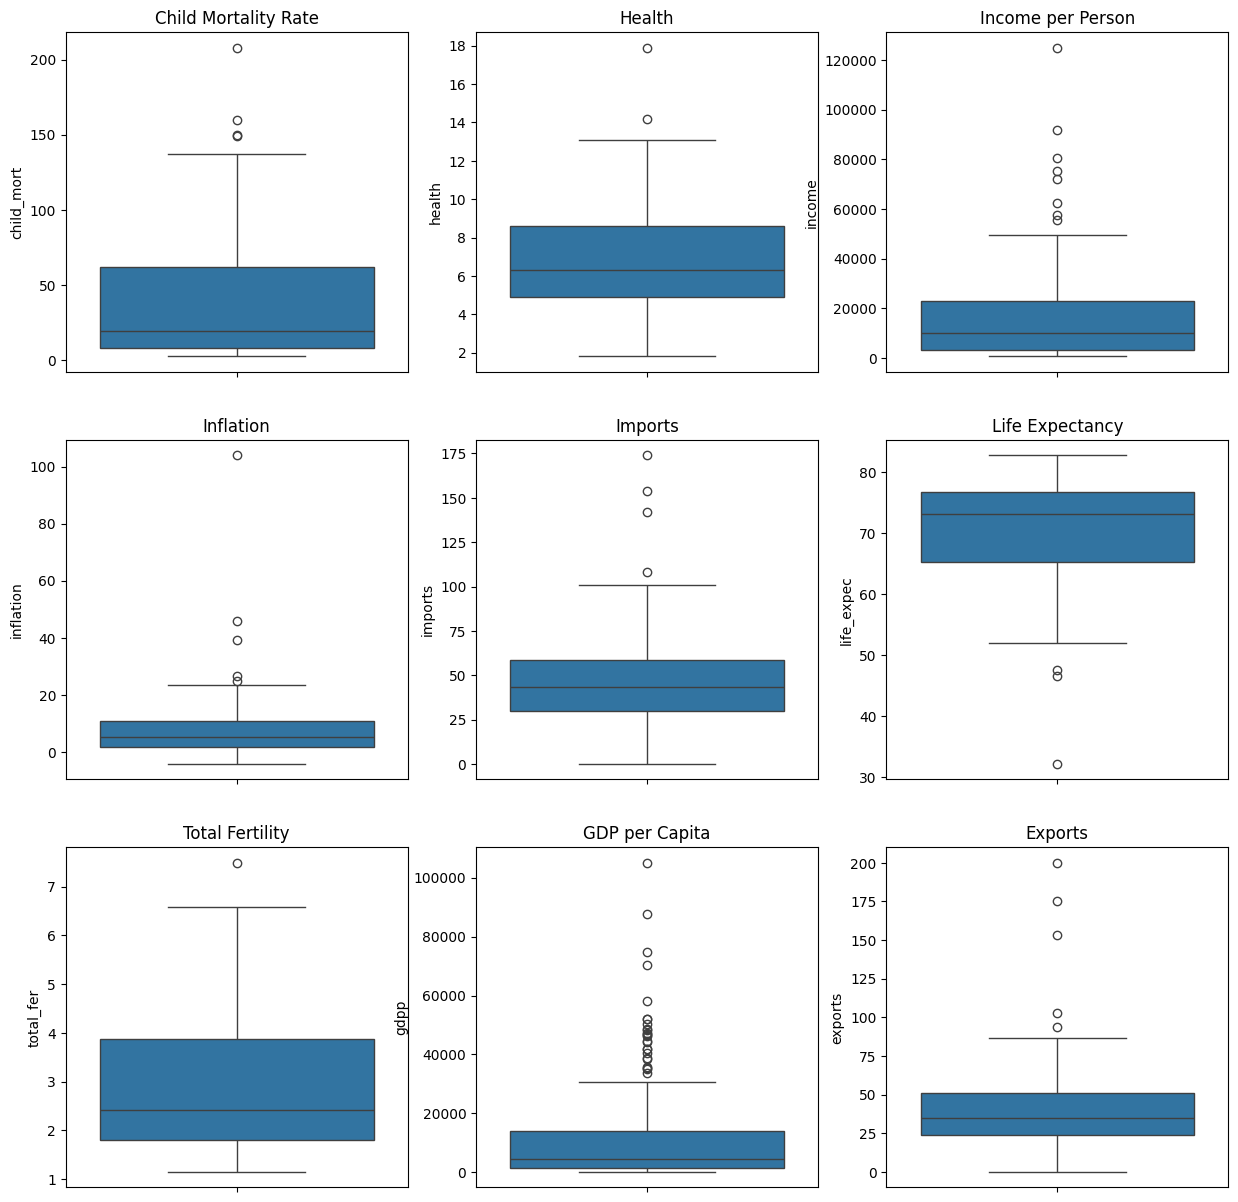

In [51]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

From above box-plots we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)

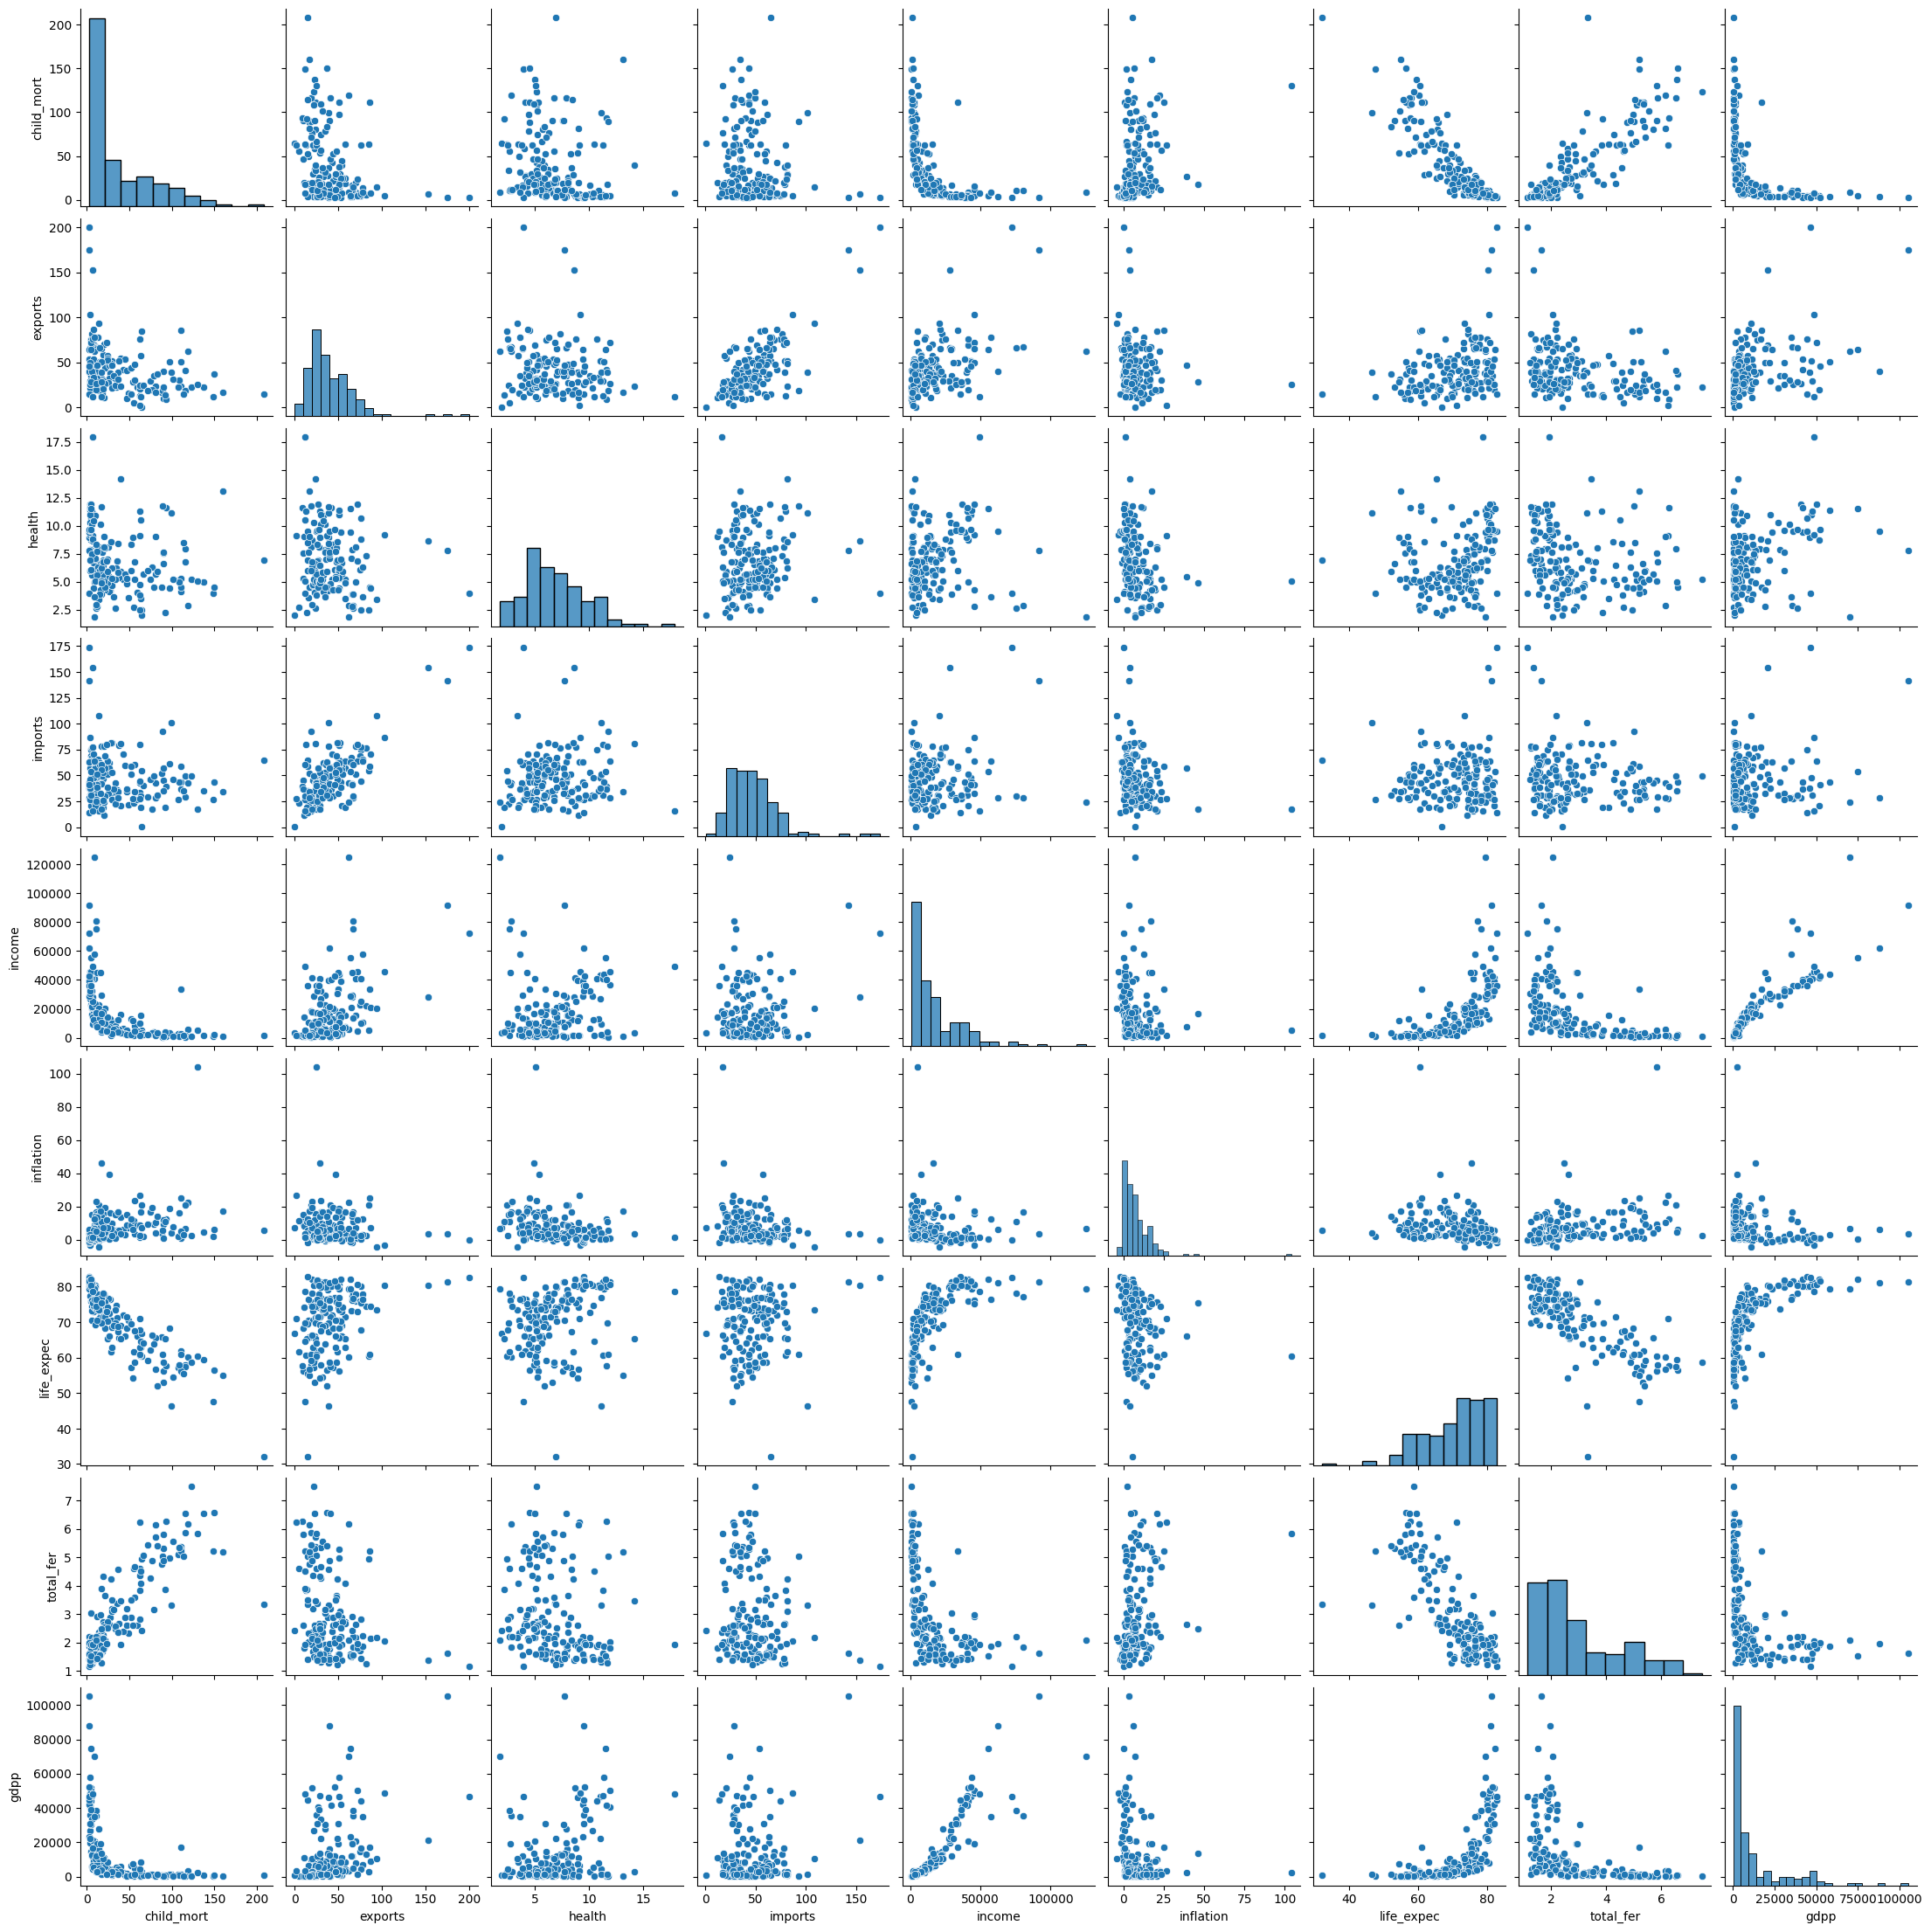

In [52]:
sns.pairplot(df)

# Scaling data

Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library<br>
**StandardScaler** transform the data such the the mean will be 0 and variance will be 1.

**Note:-** Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [53]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [54]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K-Means Clustering

K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:<br>
1. First we initialize k points called means randomly
2. Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items     categorized in the mean so far
3. We repeat the process for a given number of iteartions and at the end,we have our clusters

To decide how many number of clusters consider we are going to use a most popular elbow method

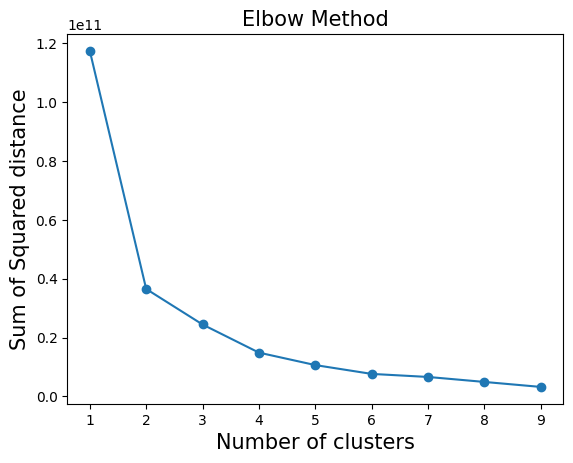

In [55]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters 

In [56]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [57]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    84
1    47
2    36
Name: count, dtype: int64

Now we are going to check how our model is,using **Silhouette Coefficient** 

In [58]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

# Prediction

In [59]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [60]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [61]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

# Visualization of clusters

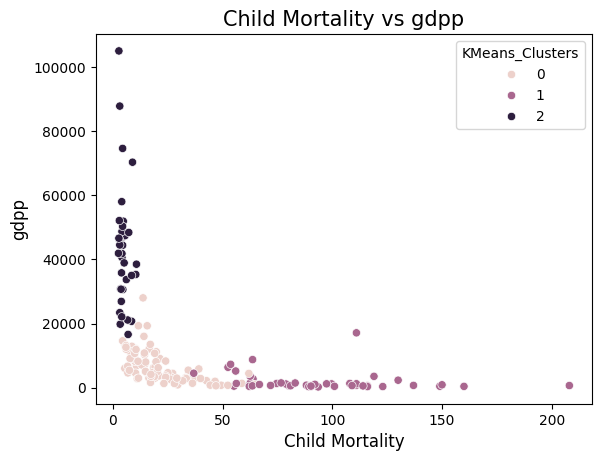

In [62]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['child_mort'], y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

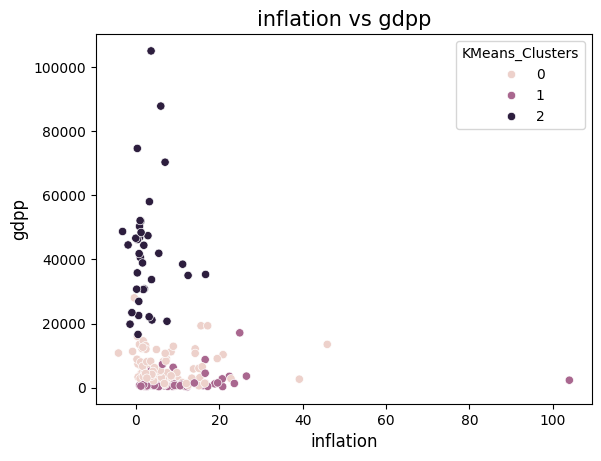

In [63]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(x=kmeans_df['inflation'], y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that<br>
1. Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a **under-developing country**
2. Country having low child-mortality, high gdpp and high infaltion is the **developed country**


**So here we conclude that**<br>
0 = **under-developing country**<br>
1 = **developing country**<br>
2 = **developed country**<br>

In [64]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 84
Number of developing countries 47
Number of under-developing countries 36


In [65]:
#list of developed countries
list(developed)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [66]:
#list of developing countries
list(developing)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

**Let's check that is Togo is present in developing countries list**

In [67]:
for i in developing:
    if i == 'Togo':
        print('Yes', i , 'is present in developing countries list')     

Yes Togo is present in developing countries list
